# Kaggle Facial Keypoints Detection
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
!pip install --upgrade --no-cache-dir gdown

In [4]:
!gdown https://drive.google.com/uc?id=1Ee3qKH7aUpB3eUQP-nUiJyJECoTzVAU1

Downloading...
From: https://drive.google.com/uc?id=1Ee3qKH7aUpB3eUQP-nUiJyJECoTzVAU1
To: /content/facial-keypoints-detection.zip
100% 78.7M/78.7M [00:00<00:00, 282MB/s]


In [5]:
!unzip /content/facial-keypoints-detection.zip

Archive:  /content/facial-keypoints-detection.zip
   creating: facial-keypoints-detection/
  inflating: facial-keypoints-detection/test.csv  
  inflating: facial-keypoints-detection/training.csv  


In [107]:
df = pd.read_csv("/content/facial-keypoints-detection/training.csv")
df.shape

(7049, 31)

In [11]:
df.head(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [12]:
df.isna().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

## 결측치 제거

In [108]:
df = df.dropna()

## 이미지 데이터를 넘파이 배열로 변환

In [109]:
df_image = df['Image']
df_image[0]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

In [110]:
tmp = np.fromstring(df_image[0], dtype='int', sep=' ')
# 문자열 -> 넘파이 배열 
len(tmp)

9216

In [111]:
df['Image'] = df['Image'].apply( lambda x : np.fromstring(x, dtype='int', sep=' ').reshape(96,96) )

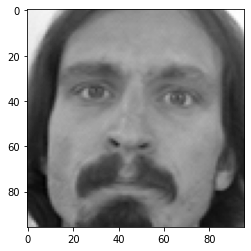

In [112]:
plt.imshow(df['Image'][0], cmap='gray')

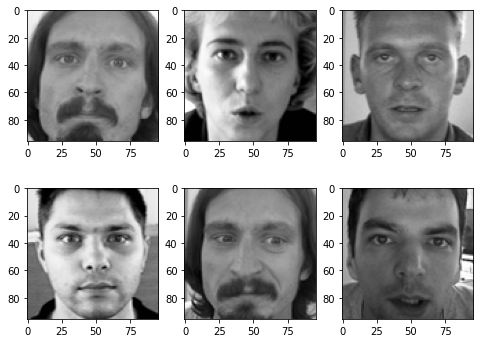

In [113]:
plt.figure(figsize=(8,6))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(df['Image'][i], cmap='gray')

plt.show()

## Facial keypoints 표시

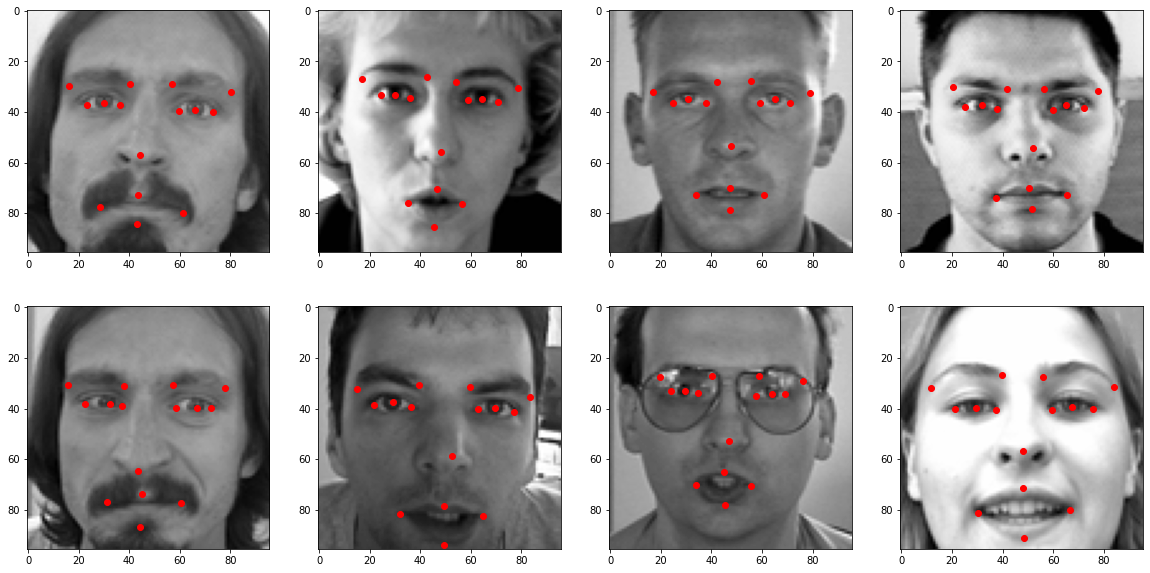

In [114]:
plt.figure(figsize=(20,10))
for idx in range(8):
  plt.subplot(2, 4, idx+1)
  plt.imshow(df['Image'][idx], cmap='gray')
  for j in range(1, 31, 2):
    # x, y 순으로 사용되므로 2칸씩 뛰어넘음
    plt.plot(df.loc[idx][j-1], df.loc[idx][j], 'ro')

plt.show()

In [38]:
df.shape

(2140, 31)

In [115]:
images = []

for i in range(df.shape[0]):
  img = df.iloc[i, -1]
  images.append(img)

images = np.array(images)
images.shape

(2140, 96, 96)

In [116]:
y_data = df.drop('Image', axis=1)
y_data.shape

(2140, 30)

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(images, y_data, test_size = 0.2)

X_train.shape, X_val.shape

((1712, 96, 96), (428, 96, 96))

## 이미지 정규화

In [119]:
X_trian = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.

In [120]:
X_trian = X_trian.reshape(-1, 96, 96, 1)
X_val = X_val.reshape(-1, 96, 96, 1)

In [121]:
y_train = np.array(y_train)
y_val = np.array(y_val)

## 모델

In [193]:
def build_model():
  model = keras.Sequential([
      layers.Conv2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)),    # use_bias=False :: b값은 학습을 안시킴
      layers.ReLU(),
      layers.BatchNormalization(),      # 원래는 batch normalization이 ReLU 이전에 있어야 함
      layers.Conv2D(32, (3,3), padding='same'),
      layers.ReLU(),
      layers.BatchNormalization(),
      layers.MaxPool2D((2,2)),
      # Conv 2번 후 MaxPooling :: VGG-16에서 사용한 구조

      layers.Conv2D(64, (3,3), padding='same', use_bias=False),    
      layers.ReLU(),
      layers.BatchNormalization(),     
      layers.Conv2D(64, (3,3), padding='same'),
      layers.ReLU(),
      layers.BatchNormalization(),
      layers.MaxPool2D((2,2)),

      layers.Conv2D(96, (3,3), padding='same', use_bias=False),    
      layers.ReLU(),
      layers.BatchNormalization(),     
      layers.Conv2D(96, (3,3), padding='same'),
      layers.ReLU(),
      layers.BatchNormalization(),
      layers.MaxPool2D((2,2)),

      layers.Conv2D(128, (3,3), padding='same', use_bias=False),    
      layers.ReLU(),
      layers.BatchNormalization(),     
      layers.Conv2D(128, (3,3), padding='same'),
      layers.ReLU(),
      layers.BatchNormalization(),
      layers.MaxPool2D((2,2)),

      layers.Conv2D(256, (3,3), padding='same', use_bias=False),    
      layers.ReLU(),
      layers.BatchNormalization(),     
      layers.Conv2D(256, (3,3), padding='same'),
      layers.ReLU(),
      layers.BatchNormalization(),
      layers.MaxPool2D((2,2)),


      layers.Flatten(),
      layers.Dense(512, activation='relu'),
      layers.Dense(30)
      # 좌표를 뽑아내야 하므로 activation 없음
  ])

  return model

In [194]:
model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 96, 96, 32)        288       
                                                                 
 re_lu_38 (ReLU)             (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_38 (Bat  (None, 96, 96, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_39 (Conv2D)          (None, 96, 96, 32)        9248      
                                                                 
 re_lu_39 (ReLU)             (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_39 (Bat  (None, 96, 96, 32)       128       
 chNormalization)                                     

In [186]:
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mae']
)

In [187]:
ckpt_path = './temp/imdb.ckpt'
ckpt_callback = keras.callbacks.ModelCheckpoint(
    ckpt_path,
    save_weights_only = True,           # False일 경우 layer도 같이 저장 (메모리 증가)
    save_best_only = True,
    monitor = 'val_loss',
    verbose = 1
)

In [188]:
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(X_train, y_train,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (X_val, y_val),
                callbacks = [ckpt_callback],
                verbose = 1)

Epoch 1/30
53/54 [============================>.] - ETA: 0s - loss: 172.4357 - mae: 7.2319
Epoch 1: val_loss improved from inf to 1277.37024, saving model to ./temp/imdb.ckpt
54/54 [==============================] - 3s 41ms/step - loss: 170.9584 - mae: 7.1921 - val_loss: 1277.3702 - val_mae: 33.1315
Epoch 2/30
53/54 [============================>.] - ETA: 0s - loss: 10.8849 - mae: 2.4788
Epoch 2: val_loss improved from 1277.37024 to 615.70764, saving model to ./temp/imdb.ckpt
54/54 [==============================] - 2s 36ms/step - loss: 10.8272 - mae: 2.4715 - val_loss: 615.7076 - val_mae: 22.9684
Epoch 3/30
53/54 [============================>.] - ETA: 0s - loss: 6.1960 - mae: 1.8606
Epoch 3: val_loss improved from 615.70764 to 349.55243, saving model to ./temp/imdb.ckpt
54/54 [==============================] - 2s 35ms/step - loss: 6.1920 - mae: 1.8608 - val_loss: 349.5524 - val_mae: 17.2319
Epoch 4/30
53/54 [============================>.] - ETA: 0s - loss: 4.7340 - mae: 1.6242
Epoch

In [189]:
model.load_weights(ckpt_path)

## 평가

In [190]:
model.evaluate(X_val, y_val)

14/14 [==============================] - 0s 12ms/step - loss: 209.5245 - mae: 13.2252


[209.52452087402344, 13.225214004516602]

In [191]:
y_pred = model.predict(X_val)
y_pred[:3]

14/14 [==============================] - 0s 9ms/step


array([[48.34581 , 27.284132, 22.551346, 25.213972, 44.16185 , 26.603851,
        53.70404 , 26.12004 , 27.121788, 26.652102, 17.604832, 24.32991 ,
        44.264027, 19.236898, 58.887173, 19.312576, 27.036516, 19.507957,
        14.385119, 16.935047, 33.534492, 42.81564 , 44.09745 , 57.55608 ,
        25.836308, 57.898415, 33.967373, 56.752304, 34.030033, 55.472237],
       [48.45614 , 27.33513 , 22.608511, 25.27355 , 44.269455, 26.653875,
        53.819073, 26.175436, 27.184149, 26.703428, 17.645481, 24.391825,
        44.355   , 19.298346, 59.004852, 19.347124, 27.089916, 19.573006,
        14.414834, 16.99955 , 33.596237, 42.862885, 44.206078, 57.648544,
        25.9468  , 58.004623, 34.05134 , 56.84851 , 34.126305, 55.53772 ],
       [48.432613, 27.312002, 22.592363, 25.261055, 44.23955 , 26.651615,
        53.79562 , 26.150515, 27.182085, 26.69313 , 17.65108 , 24.367376,
        44.34568 , 19.282787, 58.968742, 19.336128, 27.090614, 19.559658,
        14.408279, 16.966175, 33.614

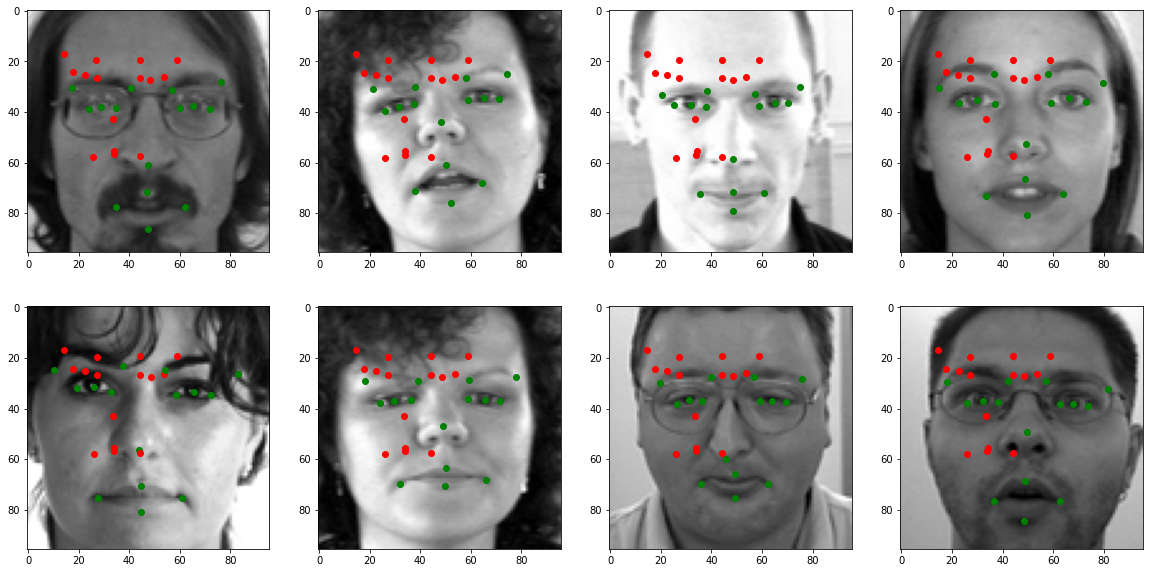

In [192]:
plt.figure(figsize=(20,10))
for idx in range(8):
  plt.subplot(2, 4, idx+1)
  plt.imshow(X_val[idx].reshape(96,96), cmap='gray')
  for j in range(1, 31, 2):
    plt.plot(y_pred[idx][j-1], y_pred[idx][j], 'ro')
    plt.plot(y_val[idx][j-1], y_val[idx][j], 'go')

plt.show()

## 테스트 데이터

In [175]:
test_data = pd.read_csv("/content/facial-keypoints-detection/test.csv")
test_data.shape

(1783, 2)

In [176]:
test_data.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [177]:
test_data['Image'] = test_data['Image'].apply( lambda x : np.fromstring(x, dtype='int', sep=' ').reshape(96,96) )

In [178]:
test_data.shape

(1783, 2)

In [179]:
images2 = []

for i in range(test_data.shape[0]):
  img = test_data.iloc[i, -1]
  images2.append(img)

images2 = np.array(images2)
images2.shape

(1783, 96, 96)

In [180]:
images2 = images2.astype('float32')/255.

In [181]:
images2 = images2.reshape(-1,96,96,1)

In [182]:
y_pred = model.predict(images2)

56/56 [==============================] - 1s 9ms/step


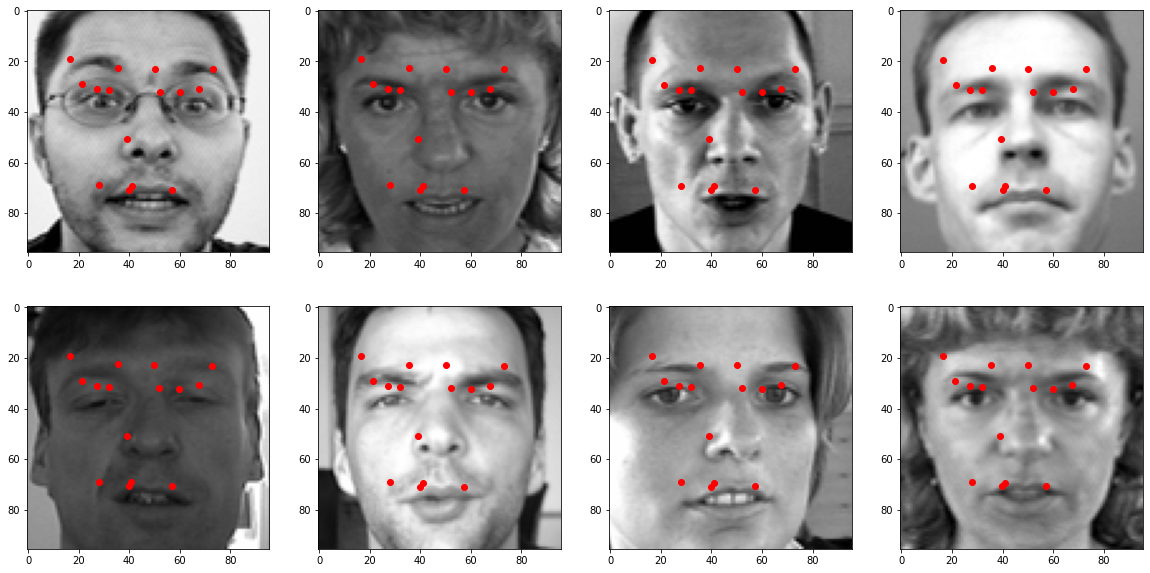

In [183]:
plt.figure(figsize=(20,10))
for idx in range(8):
  plt.subplot(2, 4, idx+1)
  plt.imshow(images2[idx].reshape(96,96), cmap='gray')
  for j in range(1, 31, 2):
    plt.plot(y_pred[idx][j-1], y_pred[idx][j], 'ro')

plt.show()